# Some examples of image manipulation for evaluating OCR

In [1]:
import cv2                      # Computer Vision
import numpy as np              # Vector math
import matplotlib.pyplot as plt # Plotting
%matplotlib inline

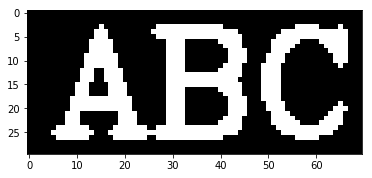

In [2]:
img = np.asarray(cv2.putText(np.zeros((30, 70)), "ABC", (5, 25), cv2.FONT_HERSHEY_COMPLEX,
                             1.0, (255, 255, 255), 2, cv2.LINE_AA)
                 , dtype=np.uint8)

plt.imshow(img, cmap='gray');

In [3]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

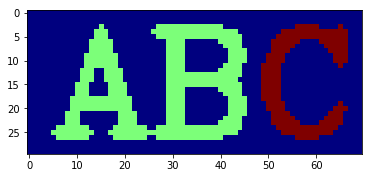

In [4]:
_, cc = cv2.connectedComponents(img, connectivity=4)
plt.imshow(cc, cmap='jet')



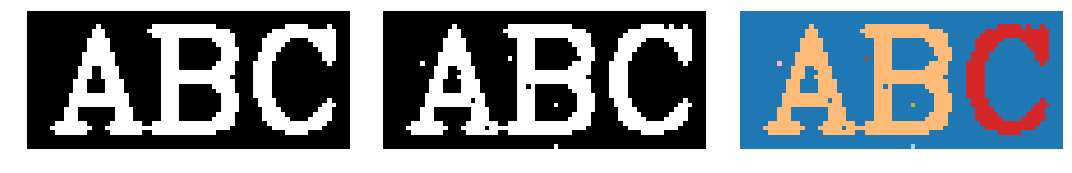

In [5]:
img_sp = img.copy()
for i in range(10):
    a = np.random.randint(img_sp.shape[0])
    b = np.random.randint(img_sp.shape[1])
    if img_sp[a, b] == 0:
        img_sp[a, b] = 255
    else:
        img_sp[a, b] = 0
    #print("Changing img_sp[%i, %i]" % (a, b))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_sp, cmap='gray')
plt.axis('off');
plt.subplot(1, 3, 3)
_, cc = cv2.connectedComponents(img_sp, connectivity=4)
plt.imshow(cc, cmap='tab20')
plt.axis('off');
plt.tight_layout()
plt.show()

In [6]:
# Median filtering

In [7]:
# Blurring

In [8]:
from skimage import measure
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np

n = 12
l = 256
np.random.seed(1)
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma= l / (4. * n))
blobs = im > 0.7 * im.mean()

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)



In [18]:
# https://docs.opencv.org/3.4.3/d7/d4d/tutorial_py_thresholding.html

img = cv2.imread('sudoku.png', 0)

#img = cv2.medianBlur(img, 5)
#ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


In [13]:
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xtick

error: OpenCV(3.4.1) /opt/conda/conda-bld/opencv-suite_1527005194613/work/modules/imgproc/src/filter.cpp:288: error: (-215) wholeSize.width > 0 && wholeSize.height > 0 in function proceed
